# GRIP-The Sparks Foundation


## Task # 2 - To Explore Supervised Machine Learning 

To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

What will be predicted score if a student study for 9.25 hrs in a day?

### Importing all the required libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Loading Dataset

In [4]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploring the dataset

In [5]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

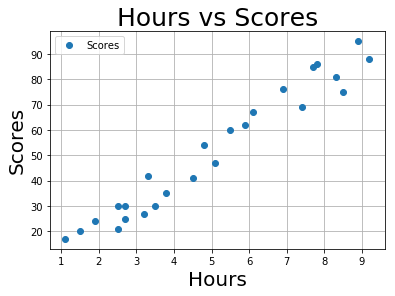

In [13]:
#Plot for the distribution of th scores
df.plot('Hours','Scores',style='o')g
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title('Hours vs Scores',fontsize=25)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Hours vs Scores')

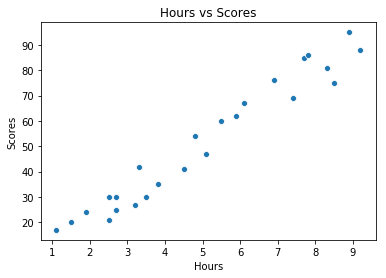

In [14]:
#scatter plot
x = df['Hours']
y = df['Scores']
sb.scatterplot(x,y)
plt.title('Hours vs Scores')

C:\Users\shri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


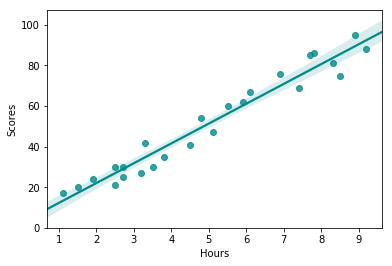

In [16]:
# Linearity
sb.regplot(x=df['Hours'],y=df['Scores'],color='darkcyan')

###  Training the Model

In [19]:
# preparing the data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                            test_size=0.2, random_state=0)

In [23]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

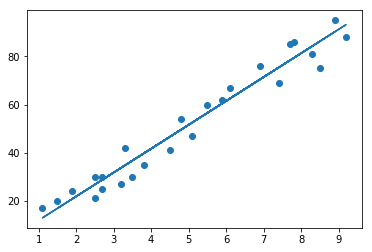

In [25]:
# plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predciction

In [35]:
y_pred = reg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [36]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


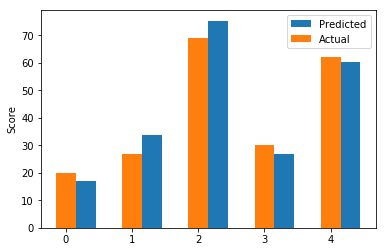

In [37]:
plt.bar(np.arange(5)+0.3,df1.Predicted,width=0.3,label='Predicted')
plt.bar(np.arange(5),df1.Actual,width=0.3,label='Actual')
plt.ylabel('Score')
plt.legend()


In [38]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
pred = reg.predict(hours)
print("No of Hours = " , hours[0][0])
print("Predicted Score = " , pred[0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


C:\Users\shri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


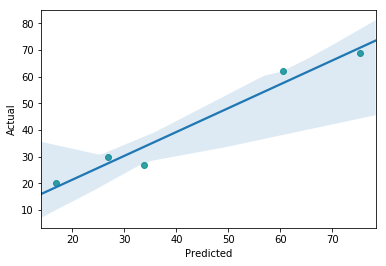

In [39]:
sb.regplot('Predicted','Actual',data=df1,scatter_kws={'color':'darkcyan'})

### Model Evaluation 

In [40]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [41]:
n = float(input())
Score = reg.predict([[n]])
print ("After Studying For {} Hours, The Estimated Score Should be \n{}".format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[93.69]
